In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power


#### 1. SETUP GRAPH
##### Define the 5 nodes and 7 edges
###### Edges: (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4)
###### edge_index = [[0, 0, 1, 1, 2, 2, 3], [1, 2, 2, 3, 3, 4, 4]]

In [3]:
num_nodes = 5
edges = [
    (0, 1), (0, 2),
    (1, 2), (1, 3),
    (2, 3), (2, 4),
    (3, 4)
]


##### 1: Compute Adjacency Matrix (A)


In [5]:
A = np.zeros((num_nodes, num_nodes), dtype=int)

for u, v in edges:
    A[u, v] = 1
    A[v, u] = 1  # Undirected graph

print("1. Adjacency Matrix (A):")
print(A)

1. Adjacency Matrix (A):
[[0 1 1 0 0]
 [1 0 1 1 0]
 [1 1 0 1 1]
 [0 1 1 0 1]
 [0 0 1 1 0]]



#### 2: Compute Degree Matrix (D)
#### Degree is the sum of each row in Adjacency matrix

In [6]:
degrees = np.sum(A, axis=1)
D = np.diag(degrees)

print("2. Degree Matrix (D):")
print(D)

2. Degree Matrix (D):
[[2 0 0 0 0]
 [0 3 0 0 0]
 [0 0 4 0 0]
 [0 0 0 3 0]
 [0 0 0 0 2]]



### 3: Compute Laplacian Matrix (L)
#### L = D - A

In [7]:
L = D - A

print("3. Laplacian Matrix (L = D - A):")
print(L)


3. Laplacian Matrix (L = D - A):
[[ 2 -1 -1  0  0]
 [-1  3 -1 -1  0]
 [-1 -1  4 -1 -1]
 [ 0 -1 -1  3 -1]
 [ 0  0 -1 -1  2]]



##### 4: Compute Normalized Laplacian (L_sym)
##### Formula: L_sym = I - D^(-1/2) * A * D^(-1/2)

#### Calculate D^(-1/2)
#### Since D is diagonal, we just take 1/sqrt(degree) for diagonal elements
#### We use float to handle division

In [8]:

d_inv_sqrt = np.power(degrees, -0.5, where=degrees!=0)
d_inv_sqrt[degrees == 0] = 0
D_inv_sqrt_mat = np.diag(d_inv_sqrt)

# Identity matrix
I = np.eye(num_nodes)

# Compute L_sym
L_sym = I - (D_inv_sqrt_mat @ A @ D_inv_sqrt_mat)

print("4. Normalized Laplacian (L_sym):")
np.set_printoptions(precision=4, suppress=True)
print(L_sym)

4. Normalized Laplacian (L_sym):
[[ 1.     -0.4082 -0.3536  0.      0.    ]
 [-0.4082  1.     -0.2887 -0.3333  0.    ]
 [-0.3536 -0.2887  1.     -0.2887 -0.3536]
 [ 0.     -0.3333 -0.2887  1.     -0.4082]
 [ 0.      0.     -0.3536 -0.4082  1.    ]]



#### 5: Compute Eigenvalues
#### We compute eigenvalues of the standard Laplacian L

In [11]:
eigenvalues = np.linalg.eigvalsh(L)

print("5. Eigenvalues of Laplacian:")
print(eigenvalues)

# Verify non-negativity (allow for small floating point errors)
is_non_negative = np.all(eigenvalues > -1e-10)
print(f"Are all eigenvalues non-negative? {is_non_negative}")

5. Eigenvalues of Laplacian:
[-0.      1.5858  3.      4.4142  5.    ]
Are all eigenvalues non-negative? True



####: Visualize Degree Distribution

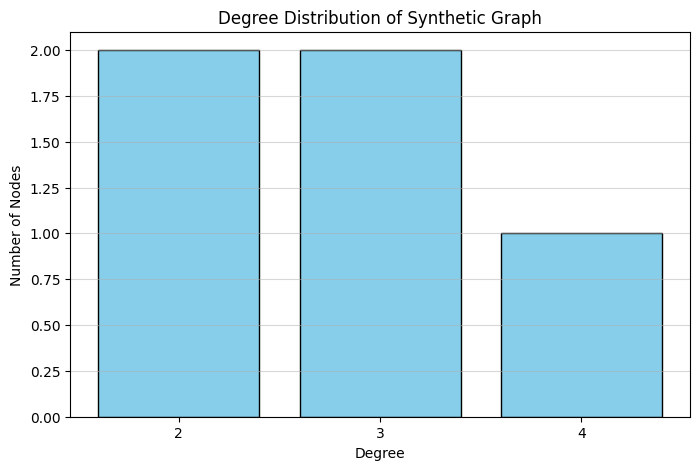

In [12]:


plt.figure(figsize=(8, 5))
# Bins centered on integers: 1.5 to 2.5 captures 2, etc.
plt.hist(degrees, bins=np.arange(min(degrees)-0.5, max(degrees)+1.5, 1),
         edgecolor='black', color='skyblue', rwidth=0.8)

plt.title("Degree Distribution of Synthetic Graph")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.xticks(range(min(degrees), max(degrees)+1))
plt.grid(axis='y', alpha=0.5)

# Save or show
plt.show()

In [2]:
!pip install torch-geometric
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 12.2 MB/s eta 0:00:00


In [2]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx
import networkx as nx
from torch_geometric.nn import GCNConv, ChebConv

In [3]:
dataset = Planetoid(root='/tmp/Cora', name='Cora')
data = dataset[0]

Processing...
Done!


In [4]:
print(dataset.num_features)

1433


In [5]:
num_nodes = data.num_nodes
print(f"num of nodes :{num_nodes}")

num of nodes :2708


In [6]:
num_edges = data.edge_index.shape[1]
print(f"num of edges :{num_edges}")

num of edges :10556


In [7]:
import pandas as pd
node_features_df = pd.DataFrame(data.x.numpy(), columns=[f'feature_{i}' for i in range(data.x.shape[1])])
node_features_df['node'] = node_features_df.index
node_features_df.set_index('node', inplace=True)

# Convert edge indices to a pandas DataFrame
edge_index_df = pd.DataFrame(data.edge_index.numpy().T, columns=['source', 'target'])

# Convert labels to a pandas DataFrame
labels_df = pd.DataFrame(data.y.numpy(), columns=['label'])
labels_df['node'] = labels_df.index
labels_df.set_index('node', inplace=True)

In [8]:

num_nodes = data.num_nodes
print(f"Number of nodes: {num_nodes}")

Number of nodes: 2708


In [9]:

num_edges = data.edge_index.shape[1]
print(f"Number of edges: {num_edges}")

Number of edges: 10556


In [10]:

print(f"\nEdge indices (shape: {edge_index_df.shape}):")
print(edge_index_df.head())


Edge indices (shape: (10556, 2)):
   source  target
0     633       0
1    1862       0
2    2582       0
3       2       1
4     652       1


In [11]:
# Print labels DataFrame
print(f"\nLabels (shape: {labels_df.shape}):")
print(labels_df.head())


Labels (shape: (2708, 1)):
      label
node       
0         3
1         4
2         4
3         0
4         3


In [13]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import GCNConv
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

dataset = Planetoid(root='./data/Cora', name='Cora')
data = dataset[0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data = data.to(device)

class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = F.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        z = self.conv2(h, edge_index)
        return z

model = GCN(dataset.num_features, 16, dataset.num_classes).to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02, weight_decay=5e-4)

def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])

    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)

        train_acc = int((pred[data.train_mask] == data.y[data.train_mask]).sum()) / int(data.train_mask.sum())
        val_acc = int((pred[data.val_mask] == data.y[data.val_mask]).sum()) / int(data.val_mask.sum())
        test_acc = int((pred[data.test_mask] == data.y[data.test_mask]).sum()) / int(data.test_mask.sum())

    return train_acc, val_acc, test_acc

best_val_acc = 0
final_results = {'train': 0.0, 'val': 0.0, 'test': 0.0}

for epoch in range(1, 201):
    loss = train()
    train_acc, val_acc, test_acc = test()

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        final_results = {'train': train_acc, 'val': val_acc, 'test': test_acc}

    if epoch % 20 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Train: {train_acc:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

print("-" * 30)
print("GCN Results (Based on Best Validation Accuracy):")
print(f"Training Accuracy: {final_results['train']:.4f}")
print(f"Validation Accuracy: {final_results['val']:.4f}")
print(f"Test Accuracy: {final_results['test']:.4f}")
print("-" * 30)

Epoch: 020, Loss: 0.0838, Train: 1.0000, Val: 0.7660, Test: 0.7930
Epoch: 040, Loss: 0.0268, Train: 1.0000, Val: 0.7640, Test: 0.7870
Epoch: 060, Loss: 0.0475, Train: 1.0000, Val: 0.7760, Test: 0.7940
Epoch: 080, Loss: 0.0364, Train: 1.0000, Val: 0.7700, Test: 0.7860
Epoch: 100, Loss: 0.0328, Train: 1.0000, Val: 0.7620, Test: 0.7900
Epoch: 120, Loss: 0.0261, Train: 1.0000, Val: 0.7580, Test: 0.7830
Epoch: 140, Loss: 0.0268, Train: 1.0000, Val: 0.7740, Test: 0.8140
Epoch: 160, Loss: 0.0161, Train: 1.0000, Val: 0.7740, Test: 0.8020
Epoch: 180, Loss: 0.0212, Train: 1.0000, Val: 0.7560, Test: 0.7950
Epoch: 200, Loss: 0.0311, Train: 1.0000, Val: 0.7760, Test: 0.8080
------------------------------
GCN Results (Based on Best Validation Accuracy):
Training Accuracy: 1.0000
Validation Accuracy: 0.7820
Test Accuracy: 0.7990
------------------------------


In [17]:
import torch
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.nn import ChebConv
import numpy as np

torch.manual_seed(42)
np.random.seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

dataset = Planetoid(root='./data/Cora', name='Cora')
data = dataset[0].to(device)

class ChebNet(torch.nn.Module):
    """2-Layer Chebyshev Network (ChebNet)."""
    def __init__(self, in_channels, hidden_channels, out_channels, K):
        super().__init__()
        self.conv1 = ChebConv(in_channels, hidden_channels, K=K)
        self.conv2 = ChebConv(hidden_channels, out_channels, K=K)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = F.relu(h)
        h = F.dropout(h, p=0.5, training=self.training)
        z = self.conv2(h, edge_index)
        return z



def train_model(model, data, epochs=200, lr=0.02):
    """General function to train and test a GNN model."""
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)
    criterion = torch.nn.CrossEntropyLoss()

    best_val_acc = 0
    test_acc = 0
    train_acc = 0

    for epoch in range(1, epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            out = model(data.x, data.edge_index)
            pred = out.argmax(dim=1)

            train_correct = (pred[data.train_mask] == data.y[data.train_mask]).sum()
            current_train_acc = int(train_correct) / int(data.train_mask.sum())

            val_correct = (pred[data.val_mask] == data.y[data.val_mask]).sum()
            val_acc = int(val_correct) / int(data.val_mask.sum())

            test_correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
            current_test_acc = int(test_correct) / int(data.test_mask.sum())

            if val_acc > best_val_acc:
                best_val_acc = val_acc
                test_acc = current_test_acc

            train_acc = current_train_acc

            if epoch % 50 == 0 or epoch == epochs:
                print(f'Epoch {epoch:03d} | Train Loss: {loss:.4f} | Val Acc: {val_acc:.4f} | Test Acc: {current_test_acc:.4f}')

    return train_acc, best_val_acc, test_acc


# --- Train ChebNet (K=2)  ---
K_default = 2
print(f"\n--- Training ChebNet (K={K_default}) Baseline ---")
cheb_model_k2 = ChebNet(
    in_channels=dataset.num_node_features,
    hidden_channels=16,
    out_channels=dataset.num_classes,
    K=K_default
).to(device)
cheb_k2_train_acc, cheb_k2_val_acc, cheb_k2_test_acc = train_model(cheb_model_k2, data)

print(f"\n--- ChebNet (K={K_default}) Final Results ---")
print(f"Training Accuracy: {cheb_k2_train_acc:.4f}")
print(f"Validation Accuracy: {cheb_k2_val_acc:.4f}")
print(f"Test Accuracy: {cheb_k2_test_acc:.4f}")
print("-" * 30)

print("\n--- ChebNet Hyperparameter Experiments ---")
results = []

#  (K=2, H=16) result as baseline for comparison
results.append({'Model': 'ChebNet', 'K': K_default, 'Hidden': 16, 'Test Acc': cheb_k2_test_acc})


#  Vary K (Order of Chebyshev polynomial)
K_values = [3, 5]
HIDDEN_SIZE_FIXED = 16

for K_val in K_values:
    print(f"\n--- Experiment: Varying K (K={K_val}, Hidden={HIDDEN_SIZE_FIXED}) ---")
    cheb_model_k = ChebNet(
        in_channels=dataset.num_node_features,
        hidden_channels=HIDDEN_SIZE_FIXED,
        out_channels=dataset.num_classes,
        K=K_val
    ).to(device)
    _, _, test_acc = train_model(cheb_model_k, data, epochs=200)
    results.append({'Model': 'ChebNet', 'K': K_val, 'Hidden': HIDDEN_SIZE_FIXED, 'Test Acc': test_acc})

# Vary Hidden Layer Size (Fix K=3)
K_FIXED = 3
hidden_sizes = [32, 64]

for hidden in hidden_sizes:
    print(f"\n--- Experiment: Varying Hidden Size (K={K_FIXED}, Hidden={hidden}) ---")
    cheb_model_h = ChebNet(
        in_channels=dataset.num_node_features,
        hidden_channels=hidden,
        out_channels=dataset.num_classes,
        K=K_FIXED
    ).to(device)
    _, _, test_acc = train_model(cheb_model_h, data, epochs=200)
    results.append({'Model': 'ChebNet', 'K': K_FIXED, 'Hidden': hidden, 'Test Acc': test_acc})

print("\n--- Hyperparameter Experiment ---")
for res in sorted(results, key=lambda x: x['Test Acc'], reverse=True):
    print(f"K={res['K']}, Hidden={res['Hidden']}: Test Accuracy = {res['Test Acc']:.4f}")


--- Training ChebNet (K=2) Baseline ---
Epoch 050 | Train Loss: 0.0221 | Val Acc: 0.7780 | Test Acc: 0.7670
Epoch 100 | Train Loss: 0.0271 | Val Acc: 0.7600 | Test Acc: 0.7650
Epoch 150 | Train Loss: 0.0304 | Val Acc: 0.7940 | Test Acc: 0.7830
Epoch 200 | Train Loss: 0.0229 | Val Acc: 0.7800 | Test Acc: 0.7840

--- ChebNet (K=2) Final Results ---
Training Accuracy: 1.0000
Validation Accuracy: 0.8020
Test Accuracy: 0.7860
------------------------------

--- ChebNet Hyperparameter Experiments ---

--- Experiment: Varying K (K=3, Hidden=16) ---
Epoch 050 | Train Loss: 0.0139 | Val Acc: 0.7320 | Test Acc: 0.7730
Epoch 100 | Train Loss: 0.0075 | Val Acc: 0.7580 | Test Acc: 0.7880
Epoch 150 | Train Loss: 0.0056 | Val Acc: 0.7840 | Test Acc: 0.8010
Epoch 200 | Train Loss: 0.0067 | Val Acc: 0.7640 | Test Acc: 0.8050

--- Experiment: Varying K (K=5, Hidden=16) ---
Epoch 050 | Train Loss: 0.0265 | Val Acc: 0.6220 | Test Acc: 0.6140
Epoch 100 | Train Loss: 0.0218 | Val Acc: 0.7000 | Test Acc: 0.